In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [54]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)


# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.

start_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
start_date = np.ravel(start_date)[0]
# end_date
records = session.query(Measurement.date, func.avg(Measurement.prcp))\
          .group_by(func.strftime('%Y-%m', Measurement.date))\
          .order_by(Measurement.date.desc()).limit(12).all()
end_date = np.ravel(records[11])[0]
print(f'Start Date: {start_date} End Date: {end_date}')

Start Date: 2017-08-23 End Date: 2016-09-01


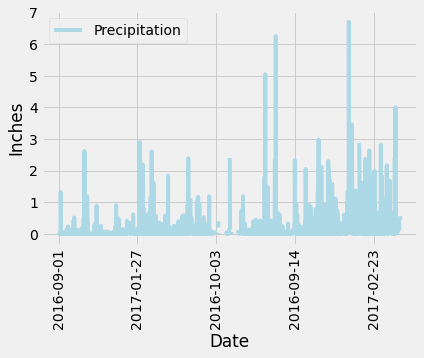

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


last12 = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date.between(end_date, start_date)).all()

last12 = pd.DataFrame.from_records(last12)
last12 = last12.rename(columns={0: 'Date', 1: 'Precipitation'})
last12.set_index(last12['Date'], inplace=True)

last12.head()


# Use Pandas Plotting with Matplotlib to plot the data
last12.plot(color='LightBlue') 
plt.xticks(rotation='90')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig('precipitation.png')
plt.legend(loc='best')

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12.describe()


,Precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement)\
.distinct(Measurement.station)\
.group_by(Measurement.station).count()
print("There are " + str(station_count) + " stations available in this dataset.")

There are 9 stations available in this dataset.


C:\Users\alexr\AppData\Local\Temp/ipykernel_27348/2280658495.py:2: SADeprecationWarning: DISTINCT ON is currently supported only by the PostgreSQL dialect.  Use of DISTINCT ON for other backends is currently silently ignored, however this usage is deprecated, and will raise CompileError in a future release for all backends that do not support this syntax.
  station_count = session.query(Measurement)\


In [61]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.tobs))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).all()
#


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
#Which station id has the highest number of observations?

most_obvs = session.query(Measurement.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).first()
print(str(most_obvs) + " has the highest number of observations.")

('USC00519281',) has the highest number of observations.


In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [64]:
#Lowest temperature
lowest_temp = session.query(func.min(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

print(str(lowest_temp) + " was the lowest temperature recorded.")

[(54.0,)] was the lowest temperature recorded.


In [65]:
#Highest temperature
highest_temp = session.query(func.max(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()
            
print(str(highest_temp) + " was the highest temperature recorded.")

[(85.0,)] was the highest temperature recorded.


In [66]:
#Average temperature
average_temp = session.query(func.avg(Measurement.tobs))\
.filter(Measurement.station == 'USC00519281').all()
            
print(str(average_temp) + " is the average temperature recorded.")

[(71.66378066378067,)] is the average temperature recorded.


In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
wslast12 = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date.between(end_date, start_date)).all()
           
wslast12 = pd.DataFrame(wslast12, columns=['Station', 'Temperature'])
wslast12.head()


,Station,Temperature
0,USC00519281,80.0
1,USC00519281,80.0
2,USC00519281,78.0
3,USC00519281,78.0
4,USC00519281,78.0


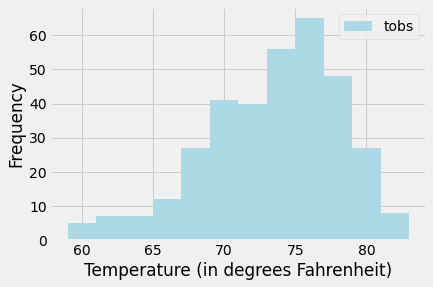

In [68]:
# Plot the results as a histogram.
wslast12.plot.hist(bins=12, color='LightBlue', label='tobs')
plt.xlabel('Temperature (in degrees Fahrenheit)')
plt.savefig('station_temp.png')
plt.legend(['tobs'])
plt.show()

# Close session

In [69]:
# Close Session
session.close()